In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(10, 10))


# Week 1

## Overview

As explained in the [*Before week 1* notebook](https://nbviewer.jupyter.org/github/lalessan/comsocsci2021/blob/master/lectures/Before_week_1.ipynb), each week of this class is a Jupyter notebook like this one. **_In order to follow the class, you simply start reading from the top_**, following the instructions.

**Hint**: And you can ask me for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* First, we will learn about Computational Social Science.
* Second, we talk a bit about APIs and how they work.
* Third, we'll use an API to download Reddit data from the _r/wallstreetbet_ subreddit



## Part 1: Computational Social Science


But _What is Computational Social Science_? Watch the  video below, where I will give a short introduction to the topic. 


> **_Video lecture_**: Watch the video below about Computational Social Science

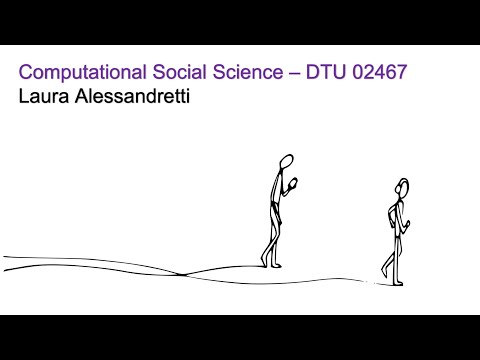

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("qoPk_C3buD8",width=600, height=337.5)


Now that you have learnt what Computational Social Science, read about the advantages and challenges of using _"Big Data"_ for Social Science Research in Sections 2.1 to 2.3 of the book Bit by Bit. 

> _Reading_: [Bit by Bit, sections 2.1 to 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/observing-intro/) Read sections 2.1 and 2.3, then skim through section 2.3. The idea is for you to understand, in general terms, advantages and challenges of large observational datasets (a.k.a. Big Data) for social studies.

> *Exercise 1*: This year, lockdowns have helped governments contain the pandemic. But they also negatively impacted our wellbeing. Imagine you had to study the following question: "_What are some of the strategies people adopt to preserve their mental and physical wellbeing during lockdown?_"
> * Write in a couple of lines: 
>> * Which data would you collect to study this topic? 
>> * How would you collect it?
> * Describe the data you would need more in details (also by writing down a couple of lines): 
>> * How big is the data (number of users/number of data points)? 
>> * Which variables it contains? 


## Part 2: Using APIs to download Reddit data

But what is an API? Find the answer in the short video below, where we get familiar with APIs to access Reddit data. 


> **_Video lecture_**: Watch the video below about the Reddit API

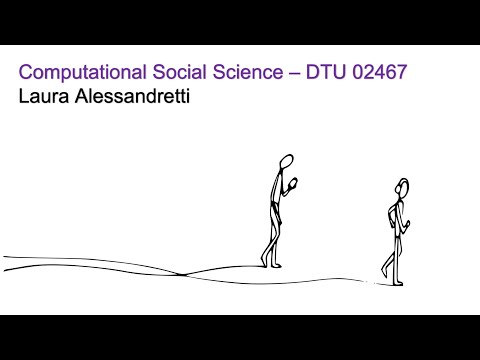

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("eqBIFua00O4",width=600, height=337.5)


In [4]:
import datetime
from psaw import PushshiftAPI
api = PushshiftAPI()
features = ["title", "id", "score", "author", "num_comments", "created_utc"]
subreddit = "wallstreetbets"
date1 = int(datetime.datetime(2020,1,1).timestamp())
date2 = int(datetime.datetime(2021,1,25).timestamp())
query = "GME|Gamestop"
gen = api.search_submissions(subreddit = subreddit, after = date1, before = date2, q = query, filter = features)
results = list(gen)

/home/oskar/.local/lib/python3.9/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [5]:
# title, id, score, date of creation, author, and number of comments 
# id, title, 'score', 'created_utc', 'author', 'num_comments'

ids, title, score, created, author, num_comments = [], [], [], [], [], []
for i in range(len(results)):
    ids.append(i)
    title.append(results[i].d_['title'])
    score.append(results[i].d_['score'])
    created.append(results[i].d_['created_utc'])
    author.append(results[i].d_['author'])
    num_comments.append(results[i].d_['num_comments'])

data = pd.DataFrame(
{
    "id" : ids,
    "title" : title,
    "score" : score,
    "created" : created,
    "author" : author,
    "num_comments" : num_comments
}, index = None)

In [6]:
from datetime import datetime
dates = [datetime.utcfromtimestamp(res.created) for res in results]
data["created"] = dates
data

,id,title,score,created,author,num_comments
0,0,I am finally buying GME &amp; BB tomorrow.,1,2021-01-24 21:59:33,mricecream429,1
1,1,Holy shit you guys https://hard-money.net/cath...,1,2021-01-24 21:57:53,steeej92,0
2,2,New member here. WHERE THE FUCK DO I BUY SOME ...,1,2021-01-24 21:56:21,krasaa,1
3,3,Is it too late to buy GME,1,2021-01-24 21:47:56,rooh62,0
4,4,What are the realistic odds GME goes tits up...?,1,2021-01-24 21:47:52,BucketOJz,0
...,...,...,...,...,...,...
8013,8013,Die $GME die,1,2020-01-13 20:12:12,Rang_Dipkin,1
8014,8014,Gamestop and Ford. This is the way,1,2020-01-09 17:21:18,callmetmrw,7
8015,8015,GME. You know what to do,1,2020-01-06 03:13:43,-deepwatervalue,0
8016,8016,I got 500€ on DEGIRO where do you advice to YO...,1,2020-01-02 15:41:45,CIARRAPUNGI,21


In [7]:
data.describe()

,id,score,num_comments
count,8018.000000,8018.000000,8018.000000
mean,4008.500000,3.340484,46.827887
std,2314.741562,49.021813,1307.650911
min,0.000000,0.000000,0.000000
25%,2004.250000,1.000000,0.000000
50%,4008.500000,1.000000,2.000000
75%,6012.750000,1.000000,17.000000
max,8017.000000,4295.000000,104174.000000


In [8]:
data = data.set_index("created")
post_counts = data.resample("1D")["title"].count()


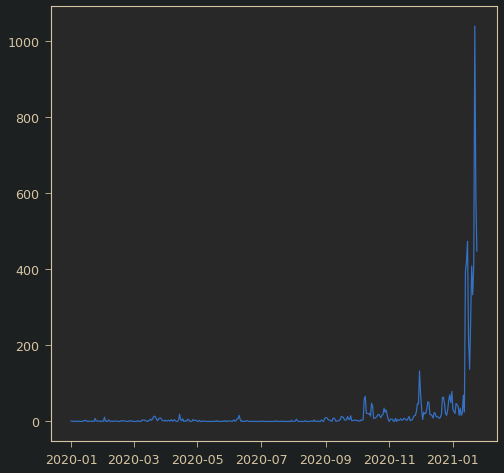

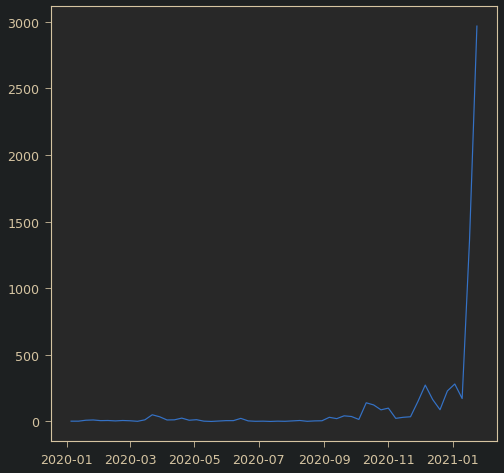

In [9]:
plt.plot(post_counts)
plt.show()

week_authors = data.resample("1W")["author"].nunique()
plt.plot(week_authors)
plt.show()

It's time for you to get to work. Take a look at the two texts below - just to get a sense of a more technical description of how the Pushshift API works.


> _Reading_ (just skim): [New to Pushshift? Read this! FAQ](https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/)  
> _Reading_ (just skim): [Pushshift Github Repository](https://github.com/pushshift/api)
> 

## Prelude to part 3: Pandas Dataframes


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package](https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **I suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn what you need to solve the next exercise.**

## Part 3: Getting data from the _r/wallstreetbet_ subreddit

There has been a lot of interest in the social platform Reddit this week, after investors from the [_r/wallstreetbet_](https://www.reddit.com/r/wallstreetbets/) subreddit managed to [give a huge boost](https://www.google.com/search?q=GME+price&oq=GME+price&aqs=chrome..69i57.1261j0j4&sourceid=chrome&ie=UTF-8) to the shares of the video game retailer's GameStop (traded as "_GME_"), causing massive losses to professional investors and established hedge funds.

There is so much buzz about _Gamestop_ because it is really something unprecedented! Online discussions about stocks on social media have fuelled massive price moves that cannot be explained by traditional valuation metrics and can seriously destabilize the established market. Many ordinary investors on Reddit have coordinated to buy shares of a stock that had been losing value for a long time. __But how did this all happen?__ 


Today and in the following classes, we will try to answer precisely this question, by studying the social network of Redditors of _r/wallstreetbet_ throughout last year. 

The starting point will be to understand how to download data from Reddit using APIs. But before we start getting our hands diry, if you feel like you don't know much about Gamestop, I suggest to watch this short video summarizing the latest events. If you already know everything about it, feel free to skip it. 

> 
> **_Video_**: [Stocks explained: What's going on with GameStop?](https://www.bbc.com/news/av/technology-55864312)
> 

> *Exercise 2*: __Download submissions of the [_r/wallstreetbet_](https://www.reddit.com/r/wallstreetbets/) subreddit using the [Pushift API](https://github.com/pushshift/api)__
> 1. Use the [psaw Python library](https://pypi.org/project/psaw/) (a wrapper for the Pushshift API) to find all the submissions in subreddit _r/wallstreetbet_', related to either "_GME_" or "_Gamestop_" (**Hint**: Use the [``q``](https://github.com/pushshift/api) parameter to search text. To search multiple words you can separate them with character "|"). Focus on the period included __between Jan,1st 2020 and Jan 25th, 2021__, where time must be provided in [Unix Timestamp](https://www.unixtimestamp.com/). _Note: The Pushift API returns at most 100 results per query, so you may need to divide your entire time period in small enough sub-periods._ 
> 2. For each submission, find the following information: __title, id, score, date of creation, author, and number of comments__ (**Hint**: access the dictionary with all attributes by typing ``my_submission.d_``). Store this data in a pandas DataFrame and save it into a file. (Downloading required me 30 minutes using two cores. While you wait for the results, you can start thinking about _Exercise 3_).
> 3. Create a figure using [``matplotlib``](https://matplotlib.org/) and plot the total number of submissions per day (**Hint**: You can use the function [``datetime.datetime.utcfromtimestamp``](https://docs.python.org/3/library/datetime.html) to convert a timestamp into a date, and you can use the function [``pd.resample``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) to aggregate by day). What do you observe? 
> 4. How many submissions have you downloaded in total? How many unique authors? 
> 5. _Optional_: How many unique authors are there each week in the period under study? 


> *Exercise 3*: __Download comments from the [_r/wallstreetbet_](https://www.reddit.com/r/wallstreetbets/) subreddit.__ The second task for today is to download the comments associated to each submission, which we will use to build the social network of Redditers.
> 1. For each submission you found in _Exercise 2_, download all the comments (*Hint*: Use the [``search_comments``](https://github.com/pushshift/api) function to search comments. You can specify the parameter ``link_id``, which corresponds to the _id_ of the submission for which you require comments).  
> 2. For each comment, store the following information: __title, id, submission, score, date of creation, author, and number of comments__. Store this in a pandas DataFrame and save it into a file. We will use it in the next classes.

> __Note__: It took me about a night to get the data for _Exercise 3_. I guess Pushshift servers are going through increasing stress due to the raising interest in the Gamestop saga. If you experience extremely slow downloading time, reach out to me! If you are brave, you can also check out the Reddit API, which is wrapped by [praw](https://praw.readthedocs.io/en/latest/tutorials/comments.html). It functions very much like psaw, but it requires you to first get credentials [here](https://www.reddit.com/prefs/apps) (click on _Create another app_)

In [12]:
from tqdm import tqdm
print(results[0].d_)
ids = []
for i in range(len(results)):
    ids.append(results[i].d_['id'])
results[0].d_

{'author': 'mricecream429', 'created_utc': 1611529173, 'id': 'l49xif', 'num_comments': 1, 'score': 1, 'title': 'I am finally buying GME &amp; BB tomorrow.', 'created': 1611525573.0}


{'author': 'mricecream429',
 'created_utc': 1611529173,
 'id': 'l49xif',
 'num_comments': 1,
 'score': 1,
 'title': 'I am finally buying GME &amp; BB tomorrow.',
 'created': 1611525573.0}

In [ ]:
features = [ "id","parent_id", "link_id", "score", "created_utc", "author"]
comments = list()
for i in tqdm(range(0,len(data),100)):
    comments += list(api.search_comments(link_id = ids[i:i+100], filter = features))




  0%|          | 0/81 [00:00<?, ?it/s]

  1%|          | 1/81 [00:03<04:07,  3.10s/it]

  2%|▏         | 2/81 [00:06<04:24,  3.35s/it]

  4%|▎         | 3/81 [00:14<06:49,  5.26s/it]Exception ignored in: <function tqdm.__del__ at 0x7fc8a36f0e50>
Traceback (most recent call last):
  File "/home/oskar/.local/lib/python3.9/site-packages/tqdm/std.py", line 1134, in __del__
    self.close()
  File "/home/oskar/.local/lib/python3.9/site-packages/tqdm/std.py", line 1281, in close
    self.display(pos=0)
  File "/home/oskar/.local/lib/python3.9/site-packages/tqdm/std.py", line 1467, in display
    self.sp(self.__repr__() if msg is None else msg)
  File "/home/oskar/.local/lib/python3.9/site-packages/tqdm/std.py", line 1137, in __repr__
    return self.format_meter(**self.format_dict)
  File "/home/oskar/.local/lib/python3.9/site-packages/tqdm/std.py", line 474, in format_meter
    bool_prefix_colon_already = (prefix[-2:] == ": ")
TypeError: 'int' object is not subscriptable
Exception ignored

In [ ]:
ids, link_id, score, created, author = [], [], [], [], []
for i in range(len(results)):
    ids.append(results[i].d_['id'])
    link_id.append(results[i].d_['link_id'])
    score.append(results[i].d_['score'])
    created.append(results[i].d_['created_utc'])
    author.append(results[i].d_['author'])

data = pd.DataFrame(
{
    "id" : ids,
    "link_id" : link_id,
    "score" : score,
    "created" : created,
    "author" : author,
}, index = None)
data.to_csv('reddit_comments', encoding='utf-8')